# ***Đồ án môn học Nhập môn Phân tích dữ liệu và Học sâu***

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Hàm tải dữ liệu
def load_data():
    df = pd.read_csv("vietnam_housing_dataset.csv")
    return df
df = load_data()


# **Mô tả dữ liệu**

In [111]:
#Hàm print dữ liệu
def print_data(df):
    display(df.head())
print_data(df)

# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

# Phân tích thống kê giá nhà
display(df["Price"].describe())

,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
dtype: int64

count    30229.000000
mean         5.872078
std          2.211877
min          1.000000
25%          4.200000
50%          5.900000
75%          7.500000
max         11.500000
Name: Price, dtype: float64

In [112]:
# Tiền xử lý dữ liệu
# Loại bỏ các dòng có giá trị bị thiếu quá nhiều (tùy vào ngưỡng)
df.dropna(thresh=len(df.columns) * 0.5, inplace=True)

# Điền giá trị trung bình cho các cột số bị thiếu
df.fillna(df.median(numeric_only=True), inplace=True)

# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])


House direction      18222
Balcony direction    21854
Legal status          2774
Furniture state      11162
dtype: int64

In [113]:
# Mô tả dữ liệu: Max, Min, Mean, STD dưới định dạng tốt hơn
descriptive_stats = df.describe().loc[["max", "min", "mean", "std"]]
display(descriptive_stats)

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
max,595.000000,77.000000,85.000000,10.000000,9.000000,9.000000,11.500000
min,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,67.464284,5.073348,6.920554,3.363596,3.467191,3.297793,5.838155
std,46.852042,3.598399,5.913382,1.283073,1.258517,1.295985,2.206988


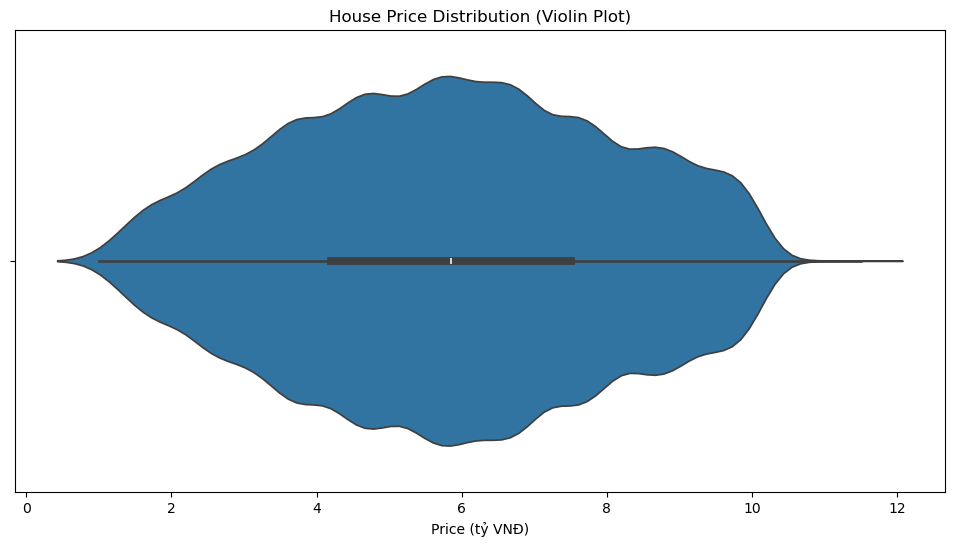

In [114]:
# Biểu đồ phân phối giá nhà violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["Price"])
plt.title("House Price Distribution (Violin Plot)")
plt.xlabel("Price (tỷ VNĐ)")
plt.show()

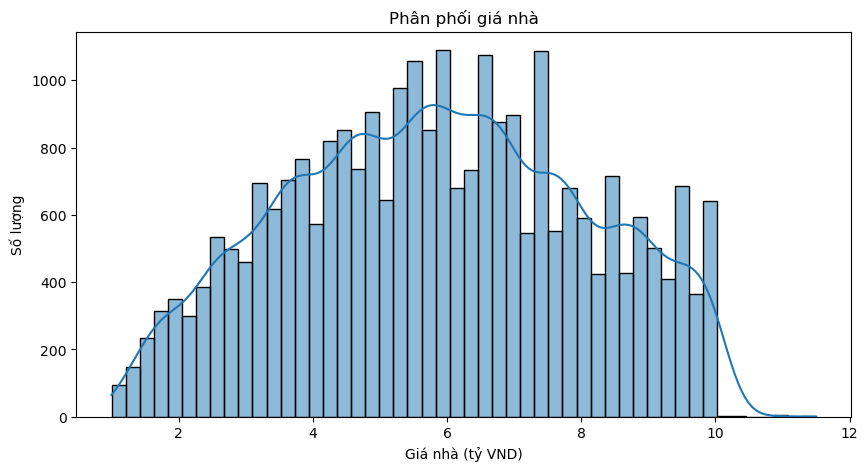

In [115]:
# Biểu đồ phân phối giá nhà
plt.figure(figsize=(10,5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.xlabel("Giá nhà (tỷ VND)")
plt.ylabel("Số lượng")
plt.title("Phân phối giá nhà")
plt.show()

In [116]:
#Loại bỏ outliers
print(f"Before filtering: {df.shape}")

numerical_cols = df.select_dtypes(include=[np.number]).columns
def remove_outlier_IQR(df, series):
    Q1=df[series].quantile(0.25)
    Q3=df[series].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[series]<(Q1-1.5*IQR)) | (df[series]>(Q3+1.5*IQR)))]
    return df_final

for column in numerical_cols:
    df = remove_outlier_IQR(df, column)

df.reset_index(inplace = True)
print(f"After filtering: {df.shape}")

Before filtering: (27096, 12)
After filtering: (14346, 13)


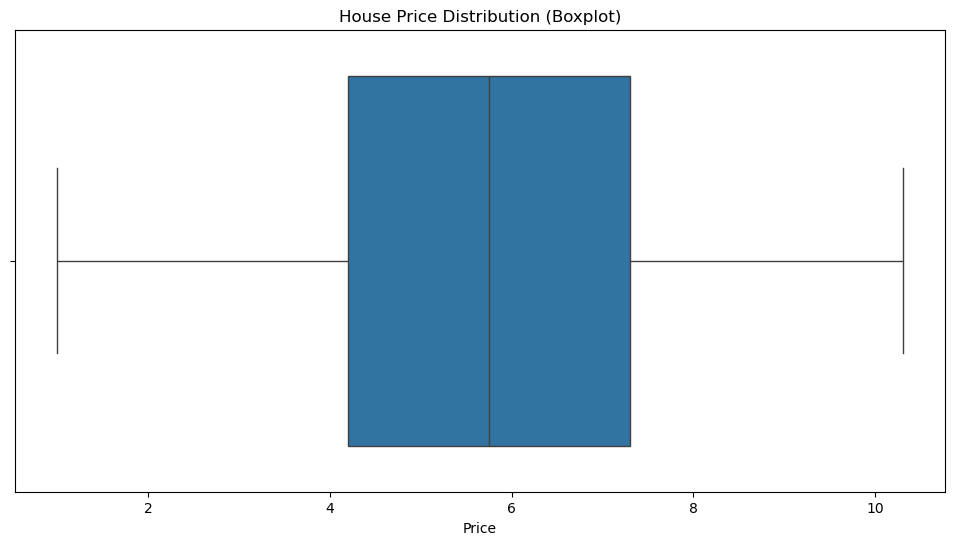

In [117]:
# Biểu đồ phân phối giá nhà dạng boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Price"])
plt.title("House Price Distribution (Boxplot)")
plt.show()

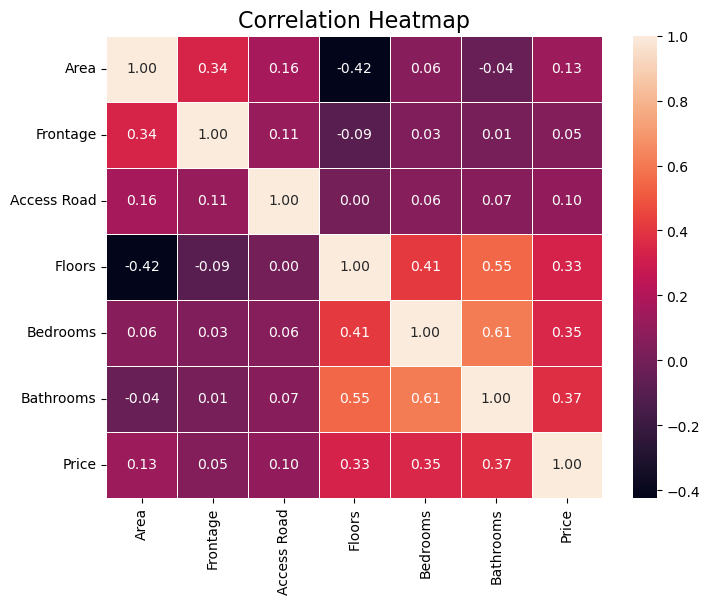

In [118]:
#Biểu đồ Correlation Heatmap
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, cbar=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# ***Phân loại***

In [119]:
#Kiểm tra dữ liệu null
df.isnull().sum()

index                    0
Address                  0
Area                     0
Frontage                 0
Access Road              0
House direction      10915
Balcony direction    12680
Floors                   0
Bedrooms                 0
Bathrooms                0
Legal status          1513
Furniture state       5815
Price                    0
dtype: int64

In [ ]:
#Loại bỏ các dữ liệu null
df.fillna({"Legal status": "None", "Furniture state": "None"}, inplace=True)
df.drop("House direction", inplace = True, axis = 1)
df.drop("Balcony direction", inplace = True, axis = 1)

In [121]:
#Tạo ra hai cột Province và Project
df["Province"] = df["Address"].str.split(", ").str[-1].str.replace(".", "")
df["Project"] = df["Address"].str.lower().str.contains("dự án").map({True: 1, False: 0})

df.head()

,index,Address,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,Province,Project
0,3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,4.5,3.5,2.0,2.0,3.0,Have certificate,Full,5.35,Hồ Chí Minh,0
1,4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,4.5,5.5,2.0,4.0,4.0,Have certificate,Full,6.90,Hồ Chí Minh,0
2,15,"Đường Phạm Văn Chiêu, Phường 14, Gò Vấp, Hồ Ch...",30.0,4.5,5.5,2.0,2.0,2.0,Have certificate,Full,3.79,Hồ Chí Minh,0
3,19,"Đường Quang Trung, Phường 12, Gò Vấp, Hồ Chí Minh",46.0,4.6,6.0,4.0,4.0,5.0,Have certificate,Full,7.99,Hồ Chí Minh,0
4,21,"Dự án Sun Casa Central, Đường Dân Chủ, Xã Vĩnh...",100.0,4.5,5.5,3.0,3.0,3.0,None,None,3.30,Bình Dương,1


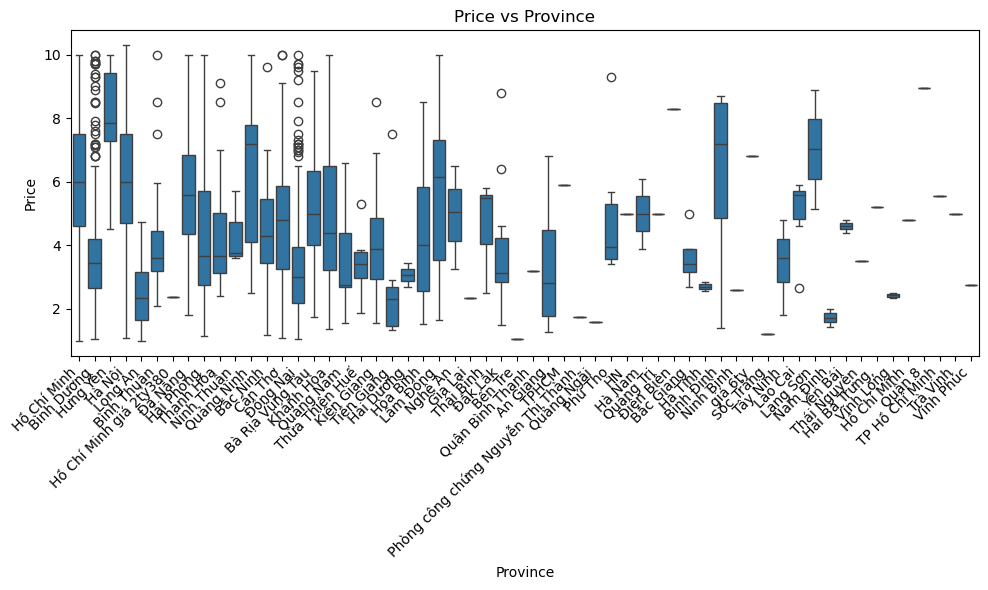

In [122]:
#Tạo boxplot phân tích Price vs Province
plt.figure(figsize=(10, 6))
sns.boxplot(x="Province", y="Price", data=df)
plt.title("Price vs Province")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

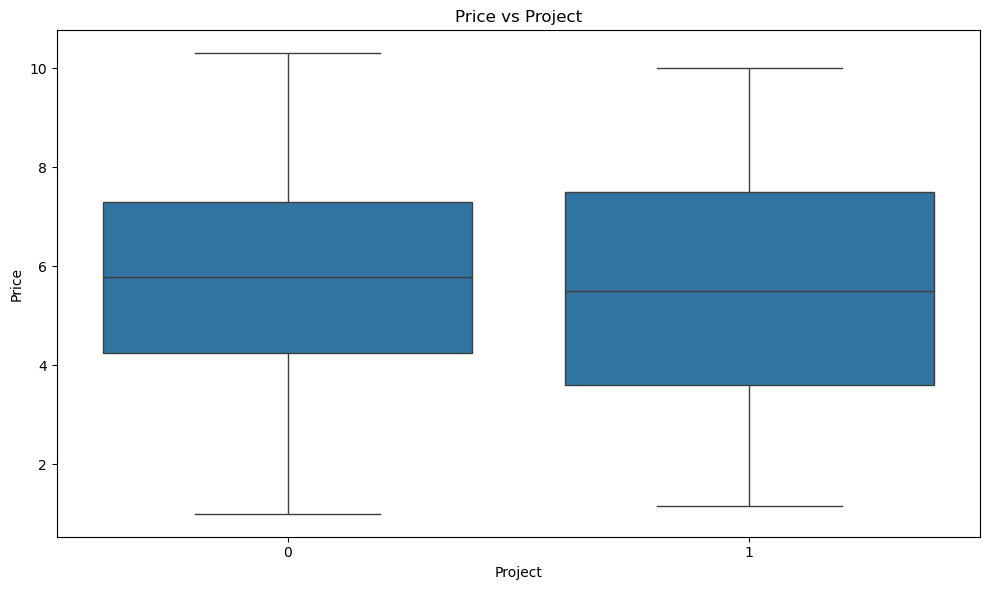

In [123]:
#Tạo boxplot phân tích Price vs Project
plt.figure(figsize=(10, 6))
sns.boxplot(x="Project", y="Price", data=df)
plt.title("Price vs Project")

plt.tight_layout()
plt.show()